In [1]:
# initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")

In [2]:
import os
from pathlib import Path
from dotenv import load_dotenv
import datetime 

In [3]:
# import philly data
philly = pd.read_csv(r'Data/philly_crime.csv')

In [4]:
philly = philly.rename(columns={"text_general_code": "general_code"})
philly = philly.rename(columns={"dispatch_date": "Year"})
philly = philly.drop(columns={"the_geom"})
philly = philly.drop(columns={"the_geom_webmercator"})

In [5]:
philly=philly[(philly['Year'] >= '2015-01-01') & (philly['Year'] <= '2021-12-31')]


In [6]:
philly.head()


,objectid,dc_dist,psa,dispatch_date_time,Year,dispatch_time,hour_,dc_key,location_block,ucr_general,general_code,point_x,point_y,lat,lng
10,117,12,1,2018-01-06 10:56:00,2018-01-06,10:56:00,10.0,201812001185,6600 BLOCK ESSINGTON AVE,600,Thefts,-75.220592,39.91443,39.91443,-75.220592
11,118,12,1,2018-06-21 22:57:00,2018-06-21,22:57:00,22.0,201812045738,6600 BLOCK ESSINGTON AVE,300,Robbery Firearm,-75.220592,39.91443,39.91443,-75.220592
12,119,12,1,2018-07-23 01:58:00,2018-07-23,01:58:00,1.0,201812053606,6600 BLOCK ESSINGTON AVE,300,Robbery No Firearm,-75.220592,39.91443,39.91443,-75.220592
13,120,12,1,2015-01-15 08:58:00,2015-01-15,08:58:00,8.0,201512003444,6600 BLOCK ESSINGTON AVE,500,Burglary Non-Residential,-75.220592,39.91443,39.91443,-75.220592
14,121,12,1,2015-05-27 20:09:00,2015-05-27,20:09:00,20.0,201512041070,6600 BLOCK ESSINGTON AVE,400,Aggravated Assault No Firearm,-75.220592,39.91443,39.91443,-75.220592


In [7]:
philly.Year.unique()

array(['2018-01-06', '2018-06-21', '2018-07-23', ..., '2021-12-19',
       '2021-11-10', '2021-11-11'], dtype=object)

In [8]:
philly_crime = philly[['Year','general_code']]
philly_crime.head()

,Year,general_code
10,2018-01-06,Thefts
11,2018-06-21,Robbery Firearm
12,2018-07-23,Robbery No Firearm
13,2015-01-15,Burglary Non-Residential
14,2015-05-27,Aggravated Assault No Firearm


In [9]:
philly_crime.Year.unique()

array(['2018-01-06', '2018-06-21', '2018-07-23', ..., '2021-12-19',
       '2021-11-10', '2021-11-11'], dtype=object)

In [10]:
philly_top_ten = philly_crime['general_code'].value_counts().head(10).reset_index()
philly_top_ten = philly_top_ten.rename(columns={"general_code": "Crime_Count","index": "Crime"})
philly_top_ten.tail(10)

,Crime,Crime_Count
0,All Other Offenses,183795
1,Other Assaults,164572
2,Thefts,160279
3,Vandalism/Criminal Mischief,103673
4,Theft from Vehicle,92522
5,Fraud,75817
6,Narcotic / Drug Law Violations,55199
7,Aggravated Assault No Firearm,37633
8,Burglary Residential,34581
9,Motor Vehicle Theft,22764


In [11]:
crimelist = philly_top_ten['Crime'].tolist()
boolean_series = philly_crime.general_code.isin(crimelist)
top_10_philly_df = philly_crime[boolean_series]
top_10_philly_df.sort_index().head(10)

,Year,general_code
10,2018-01-06,Thefts
14,2015-05-27,Aggravated Assault No Firearm
24,2016-10-31,Theft from Vehicle
28,2015-04-15,Thefts
29,2016-08-09,Thefts
32,2017-10-31,Thefts
33,2018-03-29,Thefts
34,2018-05-18,Thefts
35,2018-05-24,Thefts
37,2019-11-12,Thefts


In [12]:
top_10_philly_df.Year.unique()

array(['2018-01-06', '2015-05-27', '2016-10-31', ..., '2021-12-05',
       '2021-11-10', '2021-11-11'], dtype=object)

In [13]:
top_10_df  = top_10_philly_df.pivot_table(index="Year",
columns="general_code",
aggfunc=len,
fill_value=0)

In [14]:
top_10_df

general_code,Aggravated Assault No Firearm,All Other Offenses,Burglary Residential,Fraud,Motor Vehicle Theft,Narcotic / Drug Law Violations,Other Assaults,Theft from Vehicle,Thefts,Vandalism/Criminal Mischief
Year,,,,,,,,,,
2015-01-01,19,65,16,23,9,6,64,34,43,52
2015-01-02,14,102,18,30,6,26,67,33,64,47
2015-01-03,17,70,16,34,4,16,54,28,38,41
2015-01-04,6,61,14,14,4,8,53,32,41,41
2015-01-05,8,81,30,50,7,9,60,33,65,45
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,18,21,21,13,32,3,55,45,77,47
2021-12-28,5,26,5,30,23,10,58,36,57,42
2021-12-29,16,30,13,27,36,10,52,38,62,44


<AxesSubplot:title={'center':'Top Ten Crime Count'}, xlabel='Year'>

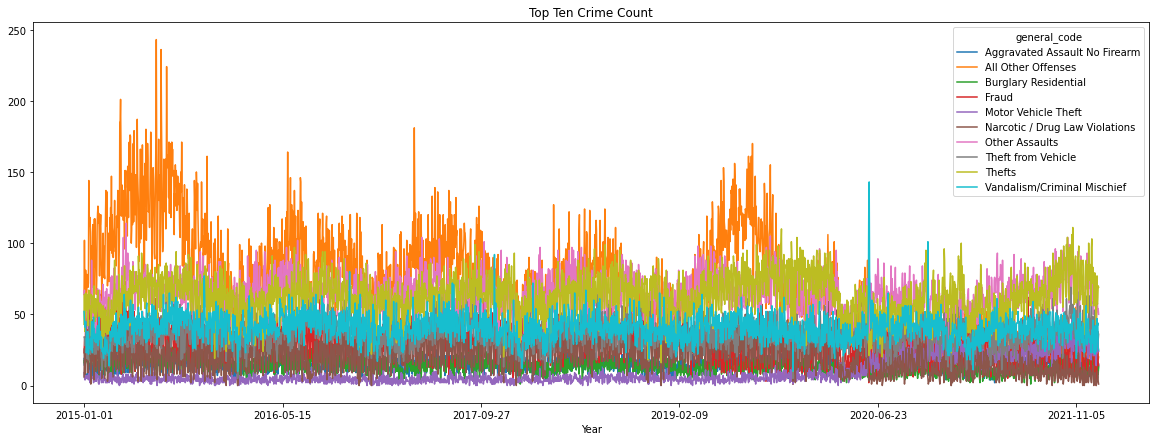

In [15]:
top_10_df.plot.line(figsize=(20,7),title='Top Ten Crime Count')


In [23]:
import hvplot.pandas
top_10_df.hvplot(width=1000,height=400)

:NdOverlay   [general_code]
   :Curve   [Year]   (value)

In [16]:
# plot of % change
top10_pct_change = top_10_df.pct_change()

In [17]:
# Syntax of iloc df.iloc[row_start:row_end , col_start, col_end]
top10_pct_change = top10_pct_change.iloc[1: , :]
top10_pct_change

general_code,Aggravated Assault No Firearm,All Other Offenses,Burglary Residential,Fraud,Motor Vehicle Theft,Narcotic / Drug Law Violations,Other Assaults,Theft from Vehicle,Thefts,Vandalism/Criminal Mischief
Year,,,,,,,,,,
2015-01-02,-0.263158,0.569231,0.125000,0.304348,-0.333333,3.333333,0.046875,-0.029412,0.488372,-0.096154
2015-01-03,0.214286,-0.313725,-0.111111,0.133333,-0.333333,-0.384615,-0.194030,-0.151515,-0.406250,-0.127660
2015-01-04,-0.647059,-0.128571,-0.125000,-0.588235,0.000000,-0.500000,-0.018519,0.142857,0.078947,0.000000
2015-01-05,0.333333,0.327869,1.142857,2.571429,0.750000,0.125000,0.132075,0.031250,0.585366,0.097561
2015-01-06,-0.125000,-0.111111,0.033333,-0.320000,-0.285714,1.888889,-0.050000,-0.303030,-0.184615,-0.200000
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.250000,0.312500,0.750000,5.500000,0.391304,0.500000,0.145833,0.216216,0.305085,0.382353
2021-12-28,-0.722222,0.238095,-0.761905,1.307692,-0.281250,2.333333,0.054545,-0.200000,-0.259740,-0.106383
2021-12-29,2.200000,0.153846,1.600000,-0.100000,0.565217,0.000000,-0.103448,0.055556,0.087719,0.047619


<AxesSubplot:title={'center':'Percent Change Top Ten Crime Types'}, xlabel='Year'>

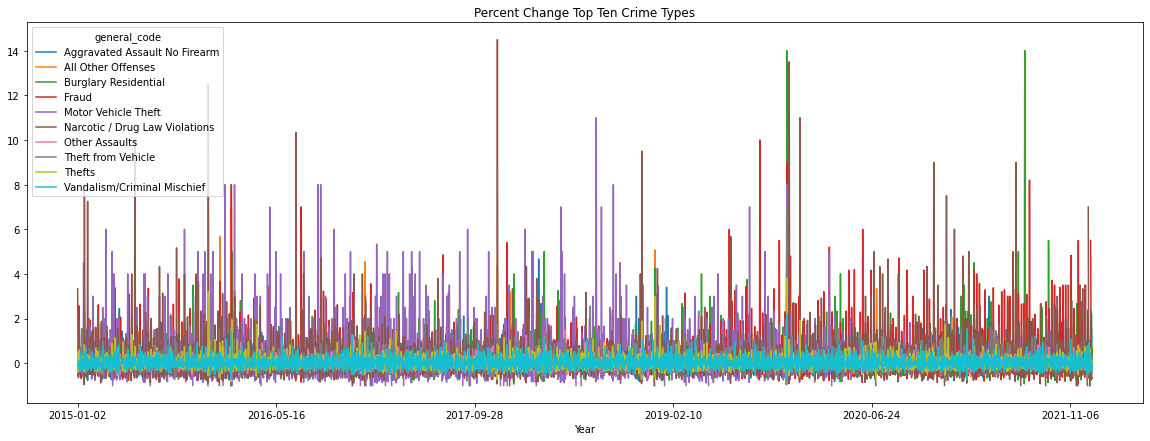

In [18]:
top10_pct_change.plot.line(figsize=(20,7),title='Percent Change Top Ten Crime Types')

In [19]:
# correlation between each column
correlation = top10_pct_change.corr()
correlation

general_code,Aggravated Assault No Firearm,All Other Offenses,Burglary Residential,Fraud,Motor Vehicle Theft,Narcotic / Drug Law Violations,Other Assaults,Theft from Vehicle,Thefts,Vandalism/Criminal Mischief
general_code,,,,,,,,,,
Aggravated Assault No Firearm,1.000000,0.048739,0.078419,0.022173,-0.005574,0.042718,0.101838,0.063898,0.065049,0.125697
All Other Offenses,0.048739,1.000000,0.218196,0.359715,0.085071,0.414658,0.172567,0.273778,0.389885,0.127389
Burglary Residential,0.078419,0.218196,1.000000,0.320158,0.089743,0.109574,0.197297,0.247373,0.315277,0.122594
Fraud,0.022173,0.359715,0.320158,1.000000,0.137060,0.218319,0.279145,0.347989,0.490789,0.099700
Motor Vehicle Theft,-0.005574,0.085071,0.089743,0.137060,1.000000,0.085516,0.049658,0.099601,0.180557,0.057052
Narcotic / Drug Law Violations,0.042718,0.414658,0.109574,0.218319,0.085516,1.000000,0.129009,0.126501,0.356408,0.009768
Other Assaults,0.101838,0.172567,0.197297,0.279145,0.049658,0.129009,1.000000,0.171536,0.305011,0.159847
Theft from Vehicle,0.063898,0.273778,0.247373,0.347989,0.099601,0.126501,0.171536,1.000000,0.321665,0.194765
Thefts,0.065049,0.389885,0.315277,0.490789,0.180557,0.356408,0.305011,0.321665,1.000000,0.132003


<AxesSubplot:xlabel='general_code', ylabel='general_code'>

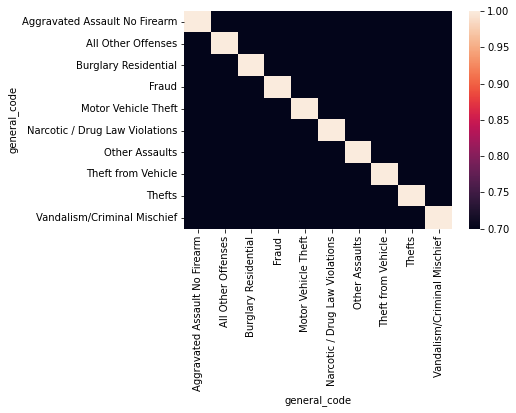

In [20]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=0.70, vmax=1)

In [21]:
# Filter for thefts on the porch
df_theft = philly[(philly["general_code"]=="Thefts")]
df_theft = df_theft.sort_values(by=['Year'], ascending=True)
df_theft.head()

,objectid,dc_dist,psa,dispatch_date_time,Year,dispatch_time,hour_,dc_key,location_block,ucr_general,general_code,point_x,point_y,lat,lng
182443,181271,8,3,2015-01-01 15:55:00,2015-01-01,15:55:00,15.0,201508000086,4300 BLOCK BYBERRY RD,600,Thefts,-74.961952,40.087595,40.087595,-74.961952
828148,821297,15,3,2015-01-01 13:07:00,2015-01-01,13:07:00,13.0,201515000196,4200 BLOCK CHIPPENDALE AVE,600,Thefts,-75.033620,40.038170,40.038170,-75.033620
469990,486003,18,3,2015-01-01 03:46:00,2015-01-01,03:46:00,3.0,201518000069,3400 BLOCK WALNUT ST,600,Thefts,-75.192673,39.952828,39.952828,-75.192673
281546,275077,9,1,2015-01-01 16:19:00,2015-01-01,16:19:00,16.0,201509000130,100 BLOCK S 17TH ST,600,Thefts,-75.168645,39.950826,39.950826,-75.168645
498307,503060,35,2,2015-01-01 02:05:00,2015-01-01,02:05:00,2.0,201535000052,1200 BLOCK W ROCKLAND ST,600,Thefts,-75.143604,40.027136,40.027136,-75.143604


In [22]:
porch_pirates_df = df_theft[boolean_series]
porch_pirates_df.sort_index().head(10)

C:\Users\aarora\Anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,objectid,dc_dist,psa,dispatch_date_time,Year,dispatch_time,hour_,dc_key,location_block,ucr_general,general_code,point_x,point_y,lat,lng
10,117,12,1,2018-01-06 10:56:00,2018-01-06,10:56:00,10.0,201812001185,6600 BLOCK ESSINGTON AVE,600,Thefts,-75.220592,39.914430,39.914430,-75.220592
28,4,9,1,2015-04-15 11:14:00,2015-04-15,11:14:00,11.0,201509015124,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
29,5,9,1,2016-08-09 20:07:00,2016-08-09,20:07:00,20.0,201609031759,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
32,8,9,1,2017-10-31 09:59:00,2017-10-31,09:59:00,10.0,201709045111,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
33,9,9,1,2018-03-29 08:01:00,2018-03-29,08:01:00,8.0,201809012266,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
34,10,9,1,2018-05-18 14:03:00,2018-05-18,14:03:00,14.0,201809019717,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
35,11,9,1,2018-05-24 16:20:00,2018-05-24,16:20:00,16.0,201809020601,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
37,13,9,1,2019-11-12 09:59:00,2019-11-12,09:59:00,9.0,201909047628,100 BLOCK S BROAD ST,600,Thefts,-75.066628,40.049264,40.049264,-75.066628
45,21,9,2,2019-01-19 17:20:00,2019-01-19,17:20:00,17.0,201909002506,1400 BLOCK SPRING GARDEN ST,600,Thefts,-75.161446,39.962334,39.962334,-75.161446
52,28,9,2,2015-01-31 12:45:00,2015-01-31,12:45:00,12.0,201509003948,1400 BLOCK SPRING GARDEN ST 210,600,Thefts,-75.161446,39.962334,39.962334,-75.161446


In [24]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("access_token")
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 4
Python-dotenv could not parse statement starting at line 5
Python-dotenv could not parse statement starting at line 6
Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 10
Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 15
Python-dotenv could not parse statement starting at line 16
Python-dotenv could not parse statement starting at line 17
Python-dotenv could not parse statement starting at line 18
Python-dotenv could not parse statement starting at line 19
Python-dotenv could not parse statement starting at line 20
Python-dotenv could not parse statement starting at line 24
Python-dotenv could not parse statement startin

In [ ]:
map_porch_pirates = px.scatter_mapbox(
    porch_pirates_df,
    lat="Latitude",
    lng="Longitude",
    color="general_code",
    animation_frame="Year",
    height = 800,
    width = 900,
    zoom=9
)
map_porch_pirates.show()